In [1]:
# !pip install censusdata
!pip install ipynb

import pandas as pd
import censusdata
import os
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import datetime 
import ipynb
#from google.colab import drive 
#drive.mount('/content/drive')

warnings.filterwarnings("ignore")

plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font


In [181]:
# Import the functions from another file (needs to be in the same directory)
from ipynb.fs.full.Functions_Activity_Plots import *

In [3]:
# os.chdir('/Users/sayaz/Documents/BEAM/BEAM CORE Validation/SF_Bay/20230510')


In [4]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [5]:
####################################------------- LOAD THE DATA -------------####################################

In [6]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [7]:
# Use actSim for ActivitySim, nhts for 2017 NHTS data, and events file for BEAM output

In [8]:
#----------------------------------------------- NHTS DATA -----------------------------------------------

In [9]:
# 2017 NHTS survey data public
nhts = read_csv('inputs/trippub.csv')
print(nhts.shape[0]) # 923572

923572


In [10]:
# Keep only the weekday trips
# print(nhts_sfbay['TDWKND'].unique())
nhts = nhts.loc[nhts['TDWKND']==2]
nhts.shape[0] # 709266

709266

In [11]:
## nhts CA
# nhts_CA = nhts.loc[nhts['HHSTATE'] == 'CA']
# nhts_CA.shape[0] # AllDays = 185666

In [12]:
#------------------------------------------ NHTS SAN FRANCISCO BAY AREA ------------------------------------------

In [13]:
# Select only for the SF Bay area

nhts_sfbay = nhts.loc[nhts['HH_CBSA'].isin(['41860', '41940'])]
nhts_sfbay.shape[0] # 17331, AllDays = 25113

17331

In [14]:
nhts_sfbay['WTTRDFIN'].describe()

# count    1.733100e+04
# mean     3.455967e+05
# std      3.037814e+05
# min      1.035993e+04
# 25%      1.367584e+05
# 50%      2.481640e+05
# 75%      4.343809e+05
# max      1.443929e+06
# Name: WTTRDFIN, dtype: float64

count    1.733100e+04
mean     3.455967e+05
std      3.037814e+05
min      1.035993e+04
25%      1.367584e+05
50%      2.481640e+05
75%      4.343809e+05
max      1.443929e+06
Name: WTTRDFIN, dtype: float64

In [15]:
#---------------------------------------------- BEAM EVENTS FILE ----------------------------------------------

In [16]:
# Beam output: events file
# Source:
# https://s3.us-east-2.amazonaws.com/beam-outputs/index.html#pilates-outputs/sfbay_baseline_20230224/beam/year-2018-iteration-6/ITERS/it.0/

In [17]:
events = read_csv('gs://beam-core-outputs/sfbay-baseline-20230526/beam/year-2020-iteration-4/ITERS/it.0/0.events.csv.gz', compression='gzip', usecols = ['type','mode','length','tripId']) # To avoid error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1
print(events.shape[0]) # 36364773

36795469


In [18]:
events['type'].unique()

# array(['ParkingEvent', 'departure', 'PersonEntersVehicle',
#        'PathTraversal', 'ModeChoice', 'actend', 'TeleportationEvent',
#        'arrival', 'actstart', 'LeavingParkingEvent', 'PersonCost',
#        'PersonLeavesVehicle', 'ReserveRideHail', 'Replanning',
#        'ChargingPlugInEvent', 'RefuelSessionEvent',
#        'ChargingPlugOutEvent'], dtype=object)

array(['ParkingEvent', 'departure', 'PersonEntersVehicle',
       'PathTraversal', 'Replanning', 'ModeChoice', 'actend',
       'TeleportationEvent', 'arrival', 'actstart', 'LeavingParkingEvent',
       'PersonCost', 'PersonLeavesVehicle', 'ReserveRideHail',
       'ChargingPlugInEvent', 'RefuelSessionEvent',
       'ChargingPlugOutEvent'], dtype=object)

In [19]:
#--------------------------------------- ACTIVITYSIM 'final_trips' FILE ---------------------------------------

In [20]:
# ActivitySim output: final_trips
# Source:
# https://s3.us-east-2.amazonaws.com/beam-outputs/index.html#pilates-outputs/sfbay_baseline_20230224/
# activitysim/year-2018-iteration-6/

actSim = read_csv('gs://beam-core-outputs/sfbay-baseline-20230526/activitysim/final_trips.csv')
print(actSim.shape[0]) # 2459473

#print(actSim.columns.tolist())
# ['trip_id', 'person_id', 'household_id', 'tour_id', 'primary_purpose', 'trip_num', 'outbound', 'trip_count', 
#  'purpose', 'destination', 'origin', 'destination_logsum', 'depart', 'trip_mode', 'mode_choice_logsum']

2511810


In [21]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [22]:
##################################------------- GENERATE THE PLOTS -------------##################################

In [23]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [24]:
#******************************************************************************************************************

In [25]:
#================================================== TRIP MODE ==================================================

In [26]:
#-------------------------------------------------- NHTS Mode --------------------------------------------------

In [27]:
nhts_sfbay['TRPTRANS'].unique()

# array([11,  5,  3,  6,  1, 13,  2,  4, 15, 18, 17,  8, 16, 20, 97, 19,  9,
#        12, 10,  7, 14])

array([11,  5,  3,  6,  1, 13,  2,  4, 15, 18, 17,  8, 16, 20, 97, 19,  9,
       12, 10,  7, 14])

In [28]:
# 1:Walk, 2:Bicycle, 
# 3:Car, 4:SUV, 5:Van, 6:Pickup truck, 
# 7:Golf cart/Segway, 8:Motorcycle/Moped, 
# 9:RV (motor home, ATV, snowmobile), 10:School bus, 11:Public or commuter bus, 12:Paratransit/Dial-a-ride, 
# 13:Private/Charter/Tour/Shuttle bus, 14:City-to-city bus (Greyhound, Megabus), 15:Amtrak/Commuter rail,
# 16:Subway/elevated/light rail/street car, 17:Taxi/limo (including Uber/Lyft), 18:Rental car (Including Zipcar/Car2Go)  
# 19:Airplane, 20:Boat/ferry/water taxi, 97:Something Else, -7:I prefer not to answer, -8:I don't know, -9: Not ascertained 

# Remove cells with values: 19,-7,-8,-9,97

In [29]:
nhts_sfbay_mode = nhts_sfbay.loc[nhts['TRPTRANS'].isin([1,2,3,4,5,6,7,8,10,11,14,15,16,17,20])]
print(str(nhts_sfbay_mode.shape[0])) # 17099

17099


In [30]:
# N_Persons_on_trip = nhts_sfbay_mode['NUMONTRP'].unique()
# N_Persons_on_trip

# array([ 1,  2,  3,  4,  6,  5,  7, 11,  8,  9, 30, 13, 21, 28, 26, 12, 10,
#        16])

In [31]:
# NHTS mode list generalized
nhts_sfbay_mode.loc[nhts_sfbay_mode['TRPTRANS'] == 1, 'Mode'] = 'Walk'
nhts_sfbay_mode.loc[nhts_sfbay_mode['TRPTRANS'].isin([2,7,8]), 'Mode'] = 'Bike'
nhts_sfbay_mode.loc[(nhts_sfbay_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_sfbay_mode['NUMONTRP'].isin([1])), 'Mode'] = 'Drive Alone'
nhts_sfbay_mode.loc[(nhts_sfbay_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_sfbay_mode['NUMONTRP'].isin([2])), 'Mode'] = 'Shared 2 Persons'
nhts_sfbay_mode.loc[(nhts_sfbay_mode['TRPTRANS'].isin([3,4,5,6]) & nhts_sfbay_mode['NUMONTRP'].isin([3,  4,  6,  5,  7, 11,  8,  9, 30, 13, 21, 28, 26, 12, 10,16])), 'Mode'] = 'Shared 3+ Persons'
nhts_sfbay_mode.loc[nhts_sfbay_mode['TRPTRANS'] == 17, 'Mode'] = 'Taxi/TNC'
nhts_sfbay_mode.loc[nhts_sfbay_mode['TRPTRANS'].isin([10, 11, 14, 15,16,20]), 'Mode'] = 'Public transit' 

print(nhts_sfbay_mode['Mode'].unique())
print(str(nhts_sfbay_mode.shape[0])) 

# ['Public transit' 'Drive Alone' 'Shared 2 Persons' 'Walk' 'Bike'
#  'Shared 3+ Persons' 'Taxi/TNC']
# 17099

['Public transit' 'Drive Alone' 'Shared 2 Persons' 'Walk' 'Bike'
 'Shared 3+ Persons' 'Taxi/TNC']
17099


In [32]:
nhts_sfbay_mode_wt = nhts_sfbay_mode.groupby('Mode')[['WTTRDFIN']].sum()

In [33]:
nhts_sfbay_mode_wt

,WTTRDFIN
Mode,
Bike,1.556805e+08
Drive Alone,2.112790e+09
Public transit,4.049629e+08
Shared 2 Persons,1.135388e+09
Shared 3+ Persons,9.588013e+08
Taxi/TNC,5.885247e+07
Walk,1.084093e+09


In [34]:
nhts_sfbay_mode_wt_percent = nhts_sfbay_mode_wt['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_sfbay_mode_wt_percent = nhts_sfbay_mode_wt_percent.reset_index()
nhts_sfbay_mode_wt_percent

,Mode,WTTRDFIN
0,Bike,2.633935
1,Drive Alone,35.745969
2,Public transit,6.851505
3,Shared 2 Persons,19.209455
4,Shared 3+ Persons,16.221811
5,Taxi/TNC,0.995716
6,Walk,18.341610


In [35]:
#-------------------------------------------------- BEAM Mode --------------------------------------------------

In [36]:
##### Use 'type' = 'ModeChoice' to generate the plots for mode type and trip length #####

In [37]:
events_type_mode_length = events.loc[events['type'] == 'ModeChoice']
print(str(events_type_mode_length.shape[0])) # 2496427
# print(str(round(events_type_mode_length.shape[0]/events.shape[0]*100, 2))  + ' % of the data') # 6.86 % of the data

2555072


In [38]:
print(events_type_mode_length.columns.tolist())

['type', 'mode', 'tripId', 'length']


In [39]:
events_type_mode_length['mode'].unique()

# array(['car_hov3', 'car', 'hov3_teleportation', 'hov2_teleportation',
#        'car_hov2', 'walk', 'bike', 'walk_transit', 'ride_hail',
#        'ride_hail_pooled', 'drive_transit', 'bike_transit'], dtype=object)

array(['car', 'hov2_teleportation', 'car_hov2', 'car_hov3', 'walk',
       'hov3_teleportation', 'bike', 'walk_transit', 'ride_hail',
       'ride_hail_pooled', 'drive_transit', 'bike_transit'], dtype=object)

In [40]:
# Beam mode list generalized

# Need to remove 'hov2_teleportation'and 'hov3_teleportation' since teleportation is not available in the NHTS data

# Keep only the following modes:
# 'car_hov2', 'car', 'car_hov3', 'bike', 'walk', 'walk_transit', 'ride_hail','ride_hail_pooled', 'drive_transit', 
# 'bike_transit'        
# events_mode = events_type_mode_length.loc[events_type_mode_length['mode'].isin(['car_hov2', 'car', 'car_hov3', 
# 'bike', 'walk', 'walk_transit', 'ride_hail','ride_hail_pooled', 'drive_transit', 'bike_transit' ])]

# print(str(events_mode.shape[0])) # 2097966

In [41]:
events_mode = events_type_mode_length

In [42]:
events_mode.loc[events_mode['mode'] == 'walk', 'Mode'] = 'Walk'
events_mode.loc[events_mode['mode'] == 'bike', 'Mode'] = 'Bike'
events_mode.loc[events_mode['mode'].isin(['car']), 'Mode'] = 'Drive Alone'
events_mode.loc[events_mode['mode'].isin(['car_hov2', 'hov2_teleportation']), 'Mode'] = 'Shared 2 Persons'
events_mode.loc[events_mode['mode'].isin(['car_hov3', 'hov3_teleportation']), 'Mode'] = 'Shared 3+ Persons'
events_mode.loc[events_mode['mode'].isin(['ride_hail', 'ride_hail_pooled']), 'Mode'] = 'Taxi/TNC'
events_mode.loc[events_mode['mode'].isin(['walk_transit', 'drive_transit', 'bike_transit']), 'Mode'] = 'Public transit' 

events_mode['Mode'].unique()
# array(['Shared 3+ Persons', 'Drive Alone', 'Shared 2 Persons', 'Walk',
#        'Bike', 'Public transit', 'Taxi/TNC'], dtype=object)

array(['Drive Alone', 'Shared 2 Persons', 'Shared 3+ Persons', 'Walk',
       'Bike', 'Public transit', 'Taxi/TNC'], dtype=object)

In [43]:
# Beam mode list generalized for all 'type' field
# events_mode.loc[events_mode['mode'] == 'walk', 'Mode'] = 'Walk'
# events_mode.loc[events_mode['mode'] == 'bike', 'Mode'] = 'Bike'
# events_mode.loc[events_mode['mode'].isin(['car_hov2', 'car',
#        'hov2_teleportation', 'car_hov3', 'hov3_teleportation']), 'Mode'] = 'Car'
# events_mode.loc[events_mode['mode'].isin(['ride_hail', 'ride_hail_pooled']), 'Mode'] = 'Taxi/TNC'
# events_mode.loc[events_mode['mode'].isin(['bus', 'tram', 'subway', 'rail', 'walk_transit', 'drive_transit', 'bike_transit', 'cable_car',
#        'ferry']), 'Mode'] = 'Public transit' 


# events_mode['Mode'].unique()
#array(['Public transit', 'Car', 'Walk', 'Bike', 'Taxi/TNC'], dtype=object)

In [44]:
events_mode_percent = events_mode.groupby('Mode')[['tripId']].count()

In [45]:
events_mode_percent['BEAM'] = events_mode_percent['tripId'].transform(lambda x: x / x.sum() * 100)
events_mode_percent = events_mode_percent.reset_index()
events_mode_percent

,Mode,tripId,BEAM
0,Bike,40505,1.585278
1,Drive Alone,1283957,50.251304
2,Public transit,178593,6.989744
3,Shared 2 Persons,432489,16.926685
4,Shared 3+ Persons,344250,13.473202
5,Taxi/TNC,41994,1.643554
6,Walk,233284,9.130232


In [46]:
# events_mode_percent['BEAM (' + str(events_mode.shape[0]) + ' ' + 'trips)'] = events_mode_percent['tripId'].transform(lambda x: x / x.sum() * 100)

In [47]:
#---------------------------------------------- ActivitySim Mode ----------------------------------------------

In [48]:
actSim['trip_mode'].unique()
# array(['SHARED3FREE', 'DRIVEALONEPAY', 'SHARED3PAY', 'TNC_SHARED', 'WALK',
#        'WALK_LOC', 'DRIVEALONEFREE', 'SHARED2FREE', 'SHARED2PAY',
#        'WALK_HVY', 'WALK_LRF', 'TNC_SINGLE', 'BIKE', 'TAXI', 'DRIVE_LOC',
#        'WALK_COM', 'DRIVE_HVY', 'DRIVE_LRF', 'DRIVE_COM'], dtype=object)

array(['SHARED2PAY', 'SHARED2FREE', 'DRIVEALONEPAY', 'SHARED3FREE',
       'SHARED3PAY', 'WALK', 'WALK_HVY', 'WALK_LOC', 'DRIVEALONEFREE',
       'TNC_SHARED', 'BIKE', 'WALK_LRF', 'TNC_SINGLE', 'TAXI', 'WALK_COM',
       'DRIVE_LOC', 'DRIVE_HVY', 'DRIVE_LRF', 'DRIVE_COM'], dtype=object)

In [49]:
# Romove rows with missing values in the trip_mode field
actSim_mode = actSim.dropna(subset = 'trip_mode')
print(actSim_mode.shape[0]) # 2459473; same as actSim, no missing value

2511810


In [50]:
# Create a field to specify the list of modes for validation
# ActivitySim mode list generalized

actSim_mode.loc[actSim_mode['trip_mode'] == 'WALK', 'Mode'] = 'Walk'
actSim_mode.loc[actSim_mode['trip_mode'] == 'BIKE', 'Mode'] = 'Bike'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['DRIVEALONEPAY', 'DRIVEALONEFREE']), 'Mode'] = 'Drive Alone'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['SHARED2PAY', 'SHARED2FREE']), 'Mode'] = 'Shared 2 Persons'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['SHARED3FREE', 'SHARED3PAY']), 'Mode'] = 'Shared 3+ Persons'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['TNC_SHARED', 'TAXI', 'TNC_SINGLE']), 'Mode'] = 'Taxi/TNC'
actSim_mode.loc[actSim_mode['trip_mode'].isin(['WALK_HVY', 'WALK_LOC','WALK_LRF', 'DRIVE_LOC', 'DRIVE_HVY', 'WALK_COM', 'DRIVE_LRF', 'DRIVE_COM']), 'Mode'] = 'Public transit' 

print(actSim_mode['Mode'].unique())
# ['Shared 3+ Persons' 'Drive Alone' 'Taxi/TNC' 'Walk' 'Public transit'
#  'Shared 2 Persons' 'Bike']

['Shared 2 Persons' 'Drive Alone' 'Shared 3+ Persons' 'Walk'
 'Public transit' 'Taxi/TNC' 'Bike']


In [51]:
actSim_mode_percent = actSim_mode.groupby('Mode')[['trip_id']].count()
actSim_mode_percent

,trip_id
Mode,
Bike,39802
Drive Alone,1189829
Public transit,200427
Shared 2 Persons,447259
Shared 3+ Persons,357697
Taxi/TNC,53018
Walk,223778


In [52]:
actSim_mode_percent['ActivitySim'] = actSim_mode_percent['trip_id'].transform(lambda x: x / x.sum() * 100)
actSim_mode_percent = actSim_mode_percent.reset_index()
actSim_mode_percent.columns

Index(['Mode', 'trip_id', 'ActivitySim'], dtype='object')

In [53]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [54]:
actSim_mode_percent = actSim_mode_percent[['Mode', 'ActivitySim']]
events_mode_percent = events_mode_percent[['Mode', 'BEAM']]
nhts_sfbay_mode_wt_percent = nhts_sfbay_mode_wt_percent[['Mode', 'WTTRDFIN']]

In [55]:
trip_mode_validation = pd.merge(actSim_mode_percent, events_mode_percent,  
                                on = 'Mode', how = 'left')

In [56]:
trip_mode_validation = pd.merge(trip_mode_validation, nhts_sfbay_mode_wt_percent, 
                                on = 'Mode', how = 'left')

In [57]:
trip_mode_validation

,Mode,ActivitySim,BEAM,WTTRDFIN
0,Bike,1.584594,1.585278,2.633935
1,Drive Alone,47.369387,50.251304,35.745969
2,Public transit,7.979385,6.989744,6.851505
3,Shared 2 Persons,17.806243,16.926685,19.209455
4,Shared 3+ Persons,14.240607,13.473202,16.221811
5,Taxi/TNC,2.110749,1.643554,0.995716
6,Walk,8.909034,9.130232,18.341610


In [58]:
trip_mode_validation.to_csv('outputs/trip_mode_validation.csv')

In [59]:
# trip_mode_validation.plot(x = 'Mode', kind = 'bar')
# plt.ylabel('Percent of modes')
# plt.title('Trip Mode Distribution')
# plt.savefig('Plot/Trip_Mode_Validation.png', dpi = 200, bbox_inches = 'tight')

In [60]:
# LEGEND
ActSim_legend_mode = 'ActivitySim (N = ' + str(actSim_mode.shape[0]) + ' ' + 'trips)'
BEAM_legend_mode = 'BEAM (N = ' + str(events_mode.shape[0]) + ' ' + 'trips)'
nhts_legend_mode = 'NHTS (N = ' + str(nhts_sfbay_mode.shape[0]) + ' ' + 'trips)'
legend_mode = [ActSim_legend_mode, BEAM_legend_mode, nhts_legend_mode]

In [234]:
def activity_plot_percentLegend(df, x_val, xlabel, ylabel, legend, title, plotname):
    df_plot = df.plot(x = x_val, kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
    plt.gca().set_facecolor('white')
    plt.grid(color='grey', linestyle='-', linewidth=0.5)
    for p in df_plot.containers:
        df_plot.bar_label(p, fmt=' %.1f%%', label_type='edge', fontsize = 16, rotation = 90)
        df_plot.xaxis.set_label_coords(0.5, -0.1)
        df_plot.yaxis.set_label_coords(-0.05, 0.5)
        df_plot.legend(legend, fontsize=16, facecolor = 'white')
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.xticks(rotation = 12, fontsize = 16)
    plt.title(title, fontsize=16)
    plt.savefig(plotname, dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
    return df_plot

<AxesSubplot: title={'center': 'Trip Mode Distribution (Weekdays)'}, xlabel='Mode', ylabel='Percent of trips'>

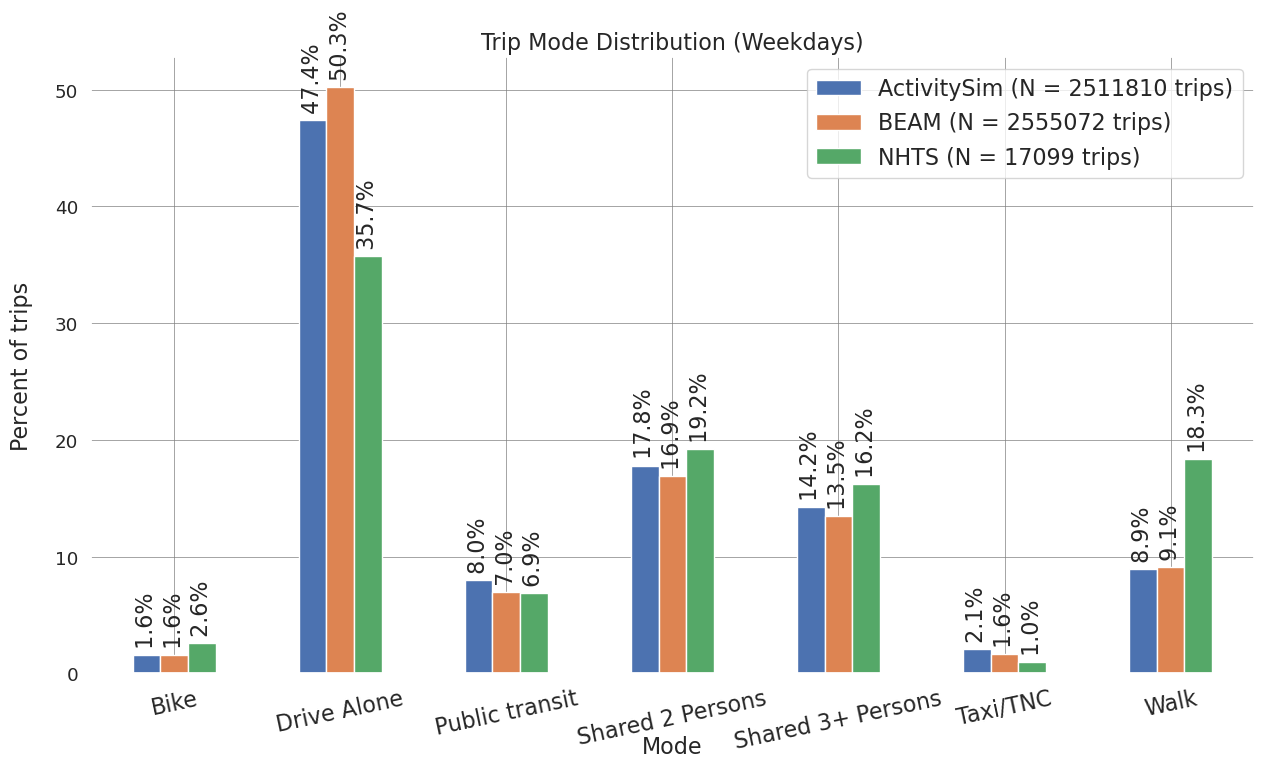

In [235]:
activity_plot_percentLegend(trip_mode_validation, 'Mode', 'Mode', 'Percent of trips', legend_mode, 'Trip Mode Distribution (Weekdays)', 
                         'Trip_Mode_Validation.png')

In [62]:
# activity_plot_showPercent(trip_mode_validation, 'Mode', 'Mode', 'Percent of trips', 'Trip Mode Distribution (Weekdays)', 
#                          'Plot/Trip_Mode_Validation.png')

In [63]:
#******************************************************************************************************************

In [64]:
#=============================================== TRIP LENGTH ===============================================

In [65]:
#----------------------------------------------- NHTS Length -----------------------------------------------

In [66]:
nhts_sfbay['TRPMILES'].unique()

# array([15.056,  5.26 , 20.409, ..., 10.248,  5.877,  4.044])

array([15.056,  5.26 , 20.409, ..., 10.248,  5.877,  4.044])

In [67]:
nhts_sfbay['TRPMILES'].min() #-9.0

-9.0

In [68]:
nhts_sfbay['TRPMILES'].max() # 8701.108

8701.108

In [69]:
# Remove the 'TRPMILES' < 0 values
nhts_sfbay_length = nhts_sfbay[nhts_sfbay['TRPMILES'] >= 0]

In [70]:
print(nhts_sfbay_length['TRPMILES'].min()) # 0.0
print(nhts_sfbay_length['TRPMILES'].max()) # 8701.108

0.0
8701.108


In [71]:
nhts_sfbay_length.loc[ (nhts_sfbay_length['TRPMILES'] >= 0) & (nhts_sfbay_length['TRPMILES'] < 5), 'Trip length' ] = '1' 
nhts_sfbay_length.loc[ (nhts_sfbay_length['TRPMILES'] >= 5) & (nhts_sfbay_length['TRPMILES'] < 10), 'Trip length' ] = '2' 
nhts_sfbay_length.loc[ (nhts_sfbay_length['TRPMILES'] >= 10) & (nhts_sfbay_length['TRPMILES'] < 15), 'Trip length' ] = '3' 
nhts_sfbay_length.loc[ (nhts_sfbay_length['TRPMILES'] >= 15) & (nhts_sfbay_length['TRPMILES'] < 20), 'Trip length' ] = '4' 
nhts_sfbay_length.loc[ nhts_sfbay_length['TRPMILES'] >= 20, 'Trip length' ] = '5' 

nhts_sfbay_length['Trip length'].unique()
# array(['>= 5, < 10 miles', '>= 20 miles', '>= 0, < 5 miles',
#        '>= 10, < 15 miles', '>= 15, < 20 miles'], dtype=object)

array(['4', '2', '5', '1', '3'], dtype=object)

In [72]:
nhts_sfbay_length_wt = nhts_sfbay_length.groupby('Trip length')[['WTTRDFIN']].sum()

In [73]:
nhts_sfbay_length_wt

,WTTRDFIN
Trip length,
1,3.955146e+09
2,8.129406e+08
3,4.383879e+08
4,2.584073e+08
5,5.203564e+08


In [74]:
nhts_sfbay_length_wt_percent = nhts_sfbay_length_wt['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_sfbay_length_wt_percent = nhts_sfbay_length_wt_percent.reset_index()
nhts_sfbay_length_wt_percent

,Trip length,WTTRDFIN
0,1,66.081680
1,2,13.582427
2,3,7.324486
3,4,4.317410
4,5,8.693996


In [75]:
# nhts_sfbay_length_wt_percent = nhts_sfbay_length_wt_percent.rename(columns = {'WTTRDFIN':'NHTS'})

In [76]:
#----------------------------------------------- BEAM Length -----------------------------------------------

In [77]:
# Trip length
events_type_mode_length['length'].unique()

array([  1362.012     ,   6188.526     ,    736.088     , ...,
         8152.128     ,  31103.06581861, 116322.24      ])

In [78]:
# Drop nan values from 'length' column
events_length = events_type_mode_length.dropna(subset = 'length')

In [79]:
events_length['length'].unique()

array([  1362.012     ,   6188.526     ,    736.088     , ...,
         8152.128     ,  31103.06581861, 116322.24      ])

In [80]:
# I think the unit is in meter; In the analyze_events.py file length is divided by 1609.34 to get miles
# Link to file: https://github.com/LBNL-UCB-STI/beam/blob/develop/src/main/python/events_analysis/analyze_events.py

print(events_type_mode_length['length'].min()) #0.001
print(events_type_mode_length['length'].max()) #251695.45522804465

0.001
205119.31894878944


In [81]:
# print(events.shape[0]) #36644243
# print(events_length.shape[0]) #11581761

In [82]:
# Create a column to convert length from meters to mile to match with the nhts unit
events_length['length_mile'] = events_length['length']/1609.34

In [83]:
print(events_length['length_mile'].min()) # 6.213727366498068e-07
print(events_length['length_mile'].max()) # 156.39669381736903

6.213727366498068e-07
127.45555255495387


In [84]:
events_length.loc[ (events_length['length_mile'] >= 0) & (events_length['length_mile'] < 5), 'Trip length' ] = '1' 
events_length.loc[ (events_length['length_mile'] >= 5) & (events_length['length_mile'] < 10), 'Trip length' ] = '2' 
events_length.loc[ (events_length['length_mile'] >= 10) & (events_length['length_mile'] < 15), 'Trip length' ] = '3' 
events_length.loc[ (events_length['length_mile'] >= 15) & (events_length['length_mile'] < 20), 'Trip length' ] = '4' 
events_length.loc[ events_length['length_mile'] >= 20, 'Trip length' ] = '5' 

In [85]:
events_length['Trip length'].unique()
# array(['>= 0, < 5 miles', '>= 10, < 15 miles', '>= 5, < 10 miles',
#        '>= 20 miles', '>= 15, < 20 miles'], dtype=object)

array(['1', '2', '5', '3', '4'], dtype=object)

In [86]:
## Plot for trip length all modes

In [87]:
events_length_percent = distribution(events_length, 'Trip length', 'tripId', 'BEAM')
events_length_percent

,Trip length,BEAM
0,1,56.124368
1,2,21.744006
2,3,9.440869
3,4,5.003655
4,5,7.687102


In [88]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [89]:
merged_length = merge_df(events_length_percent, nhts_sfbay_length_wt_percent, 'Trip length')
merged_length

,Trip length,BEAM,WTTRDFIN
0,1,56.124368,66.081680
1,2,21.744006,13.582427
2,3,9.440869,7.324486
3,4,5.003655,4.317410
4,5,7.687102,8.693996


In [90]:
# merged_length = merged_length.rename(columns = {'BEAM (2512933 trips)': 'BEAM (2,512,933 trips)'})

In [91]:
merged_length.to_csv('outputs/trip_length_validation_all_modes.csv')

In [92]:
# NHTS_no_of_trips = nhts_sfbay_length[['WTTRDFIN']].count()
# NHTS_no_of_trips


In [93]:
BEAM_legend_length = 'BEAM (N = ' + str(events_length.shape[0]) + ' ' + 'trips)'
nhts_legend_length = 'NHTS (N = ' + str(nhts_sfbay_length.shape[0]) + ' ' + 'trips)'
legend_length = [BEAM_legend_length, nhts_legend_length]

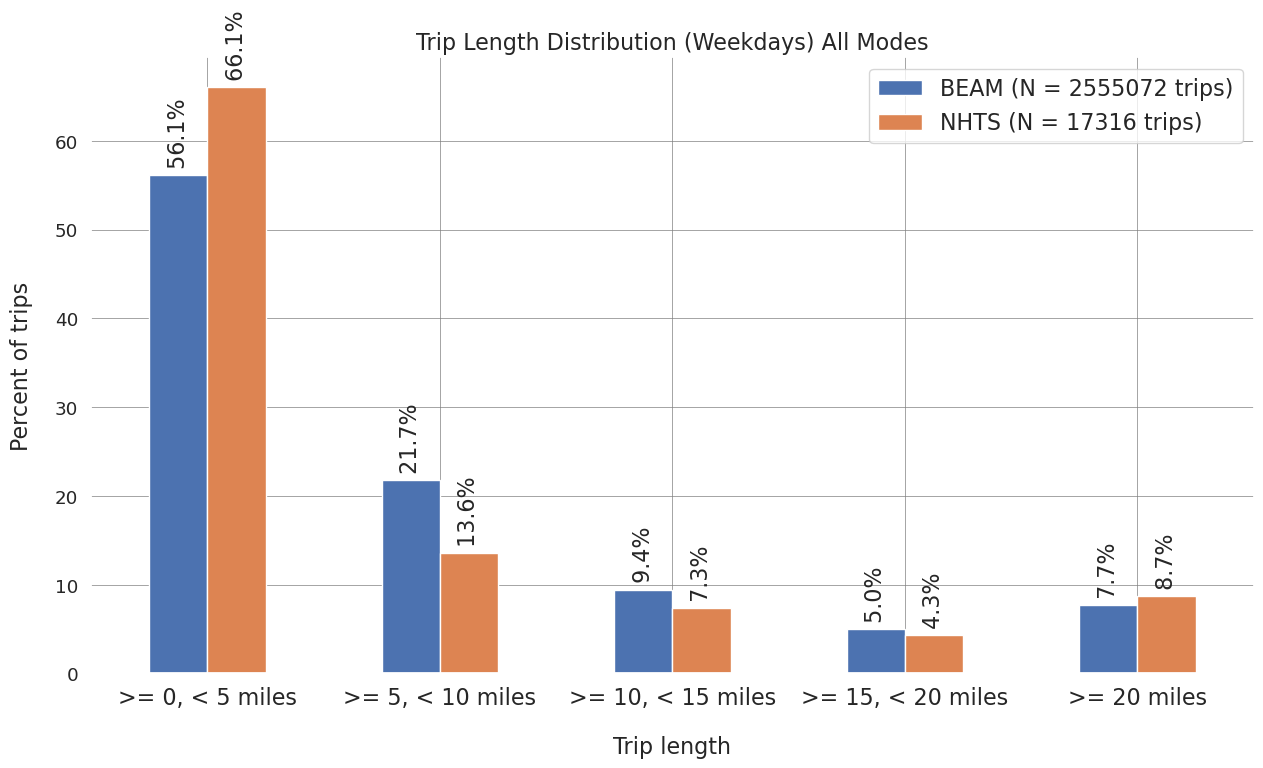

In [236]:
df = merged_length
xtickLabels = ['>= 0, < 5 miles', '>= 5, < 10 miles', '>= 10, < 15 miles', '>= 15, < 20 miles', '>= 20 miles']
df_plot = df.plot('Trip length', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
for p in df_plot.containers:
    df_plot.bar_label(p, fmt=' %.1f%%', label_type='edge', fontsize = 16, rotation = 90)
    df_plot.xaxis.set_label_coords(0.5, -0.1)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.set_xticklabels(xtickLabels, fontsize=16)
    df_plot.legend(legend_length, fontsize=16, facecolor = 'white')
plt.xlabel('Trip length', fontsize = 16)
plt.ylabel('Percent of trips', fontsize = 16)
plt.xticks(rotation = 360, fontsize = 16)
plt.title('Trip Length Distribution (Weekdays) All Modes', fontsize=16)
plt.savefig('Trip_Length_Validation.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()

In [95]:
# activity_plot_showPercent(merged_length, 'Trip length', 'Trip length', 'Percent of trips', 'Trip Length Distribution (Weekdays) All Modes', 
#                          'Plot/Trip_Length_Validation.png')

In [96]:
#******************************************************************************************************************

In [97]:
#=========================================== TRIP LENGTH (CAR ONLY) ===========================================

In [98]:
#-------------------------------------------- NHTS Length (Car Only) --------------------------------------------

In [99]:
nhts_sfbay_length_car = nhts_sfbay_length.loc[nhts_sfbay_length['TRPTRANS'].isin([3,4,5,6])]
nhts_sfbay_length_car['Trip length'].shape[0] # 12469

12469

In [100]:
nhts_sfbay_length_wt_car = nhts_sfbay_length_wt.groupby('Trip length')[['WTTRDFIN']].sum()

In [101]:
nhts_sfbay_length_wt_car

,WTTRDFIN
Trip length,
1,3.955146e+09
2,8.129406e+08
3,4.383879e+08
4,2.584073e+08
5,5.203564e+08


In [102]:
nhts_sfbay_length_wt_car_percent = nhts_sfbay_length_wt_car['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_sfbay_length_wt_car_percent = nhts_sfbay_length_wt_car_percent.reset_index()
nhts_sfbay_length_wt_car_percent

,Trip length,WTTRDFIN
0,1,66.081680
1,2,13.582427
2,3,7.324486
3,4,4.317410
4,5,8.693996


In [103]:
#-------------------------------------------- BEAM Length (Car Only) --------------------------------------------

In [104]:
events_length_car = events_length.loc[events_length['mode'].isin(['car_hov2', 'car',
        'car_hov3'])]

In [105]:
# events_length_car = events_length.loc[events_length['mode'].isin(['car_hov2', 'car',
#        'hov2_teleportation', 'car_hov3', 'hov3_teleportation'])]

In [106]:
events_length_car['Trip length'].shape[0] # 1675560

1664518

In [107]:
events_length_percent_car = distribution(events_length_car, 'Trip length', 'tripId', 'BEAM ')
events_length_percent_car

,Trip length,BEAM
0,1,49.345036
1,2,24.235004
2,3,10.872577
3,4,5.955057
4,5,9.592326


In [108]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [109]:
merged_length_car = merge_df(events_length_percent_car, nhts_sfbay_length_wt_car_percent, 'Trip length')
merged_length_car

,Trip length,BEAM,WTTRDFIN
0,1,49.345036,66.081680
1,2,24.235004,13.582427
2,3,10.872577,7.324486
3,4,5.955057,4.317410
4,5,9.592326,8.693996


In [110]:
# merged_length_car = merged_length_car.rename(columns = {'BEAM (1691815 trips)':'BEAM (1,691,815 trips)', 'WTTRDFIN':'NHTS (12,525 trips)'})

In [111]:
merged_length_car.to_csv('outputs/trip_length_validation_carnly.csv')

In [112]:
# LEGEND for the Plot
BEAM_legend_length_car = 'BEAM (N = ' + str(events_length_car.shape[0]) + ' ' + 'trips)'
nhts_legend_length_car = 'NHTS (N = ' + str(nhts_sfbay_length_wt_car.shape[0]) + ' ' + 'trips)'
legend_length_car = [BEAM_legend_length, nhts_legend_length]

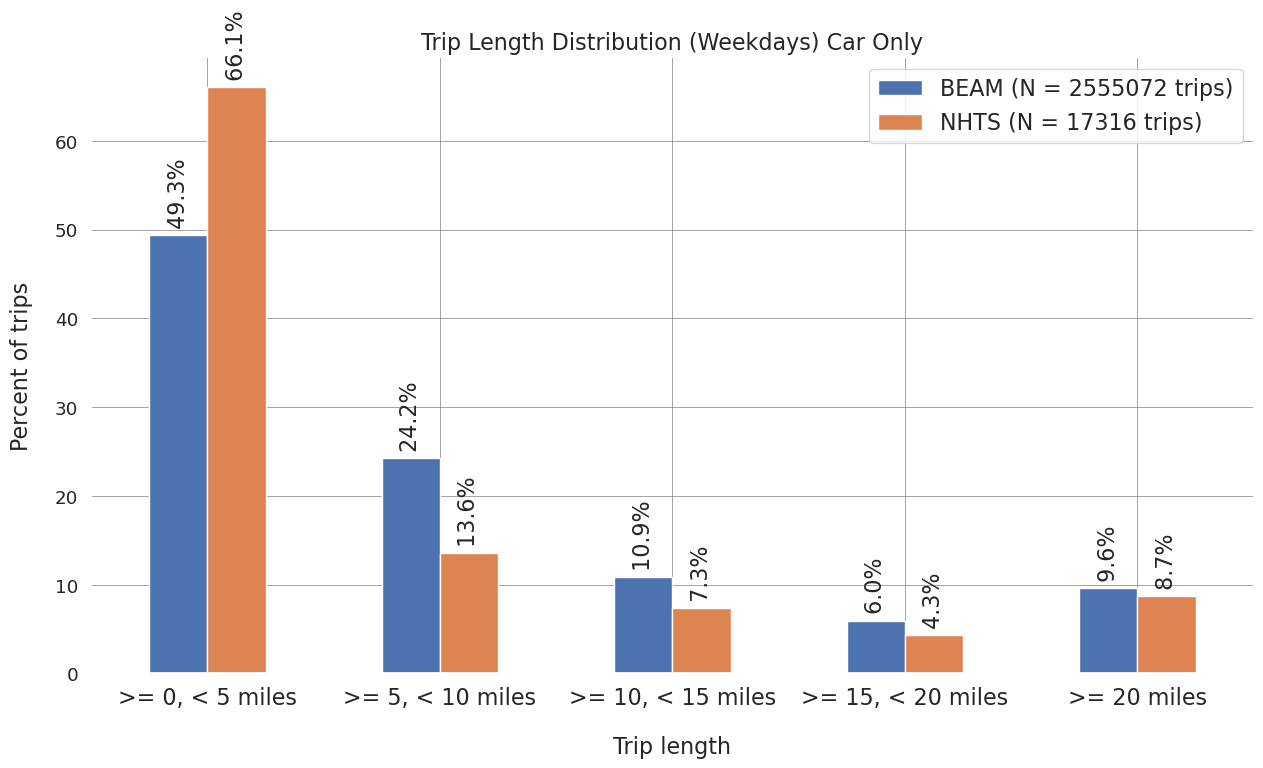

In [223]:
# Plot
df = merged_length_car
xtickLabels = ['>= 0, < 5 miles', '>= 5, < 10 miles', '>= 10, < 15 miles', '>= 15, < 20 miles', '>= 20 miles']
df_plot = df.plot('Trip length', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
for p in df_plot.containers:
    df_plot.bar_label(p, fmt=' %.1f%%', label_type='edge', fontsize = 16, rotation = 90)
    df_plot.xaxis.set_label_coords(0.5, -0.1)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.legend(legend_length_car, fontsize=16, facecolor = 'white')
    df_plot.set_xticklabels(xtickLabels, fontsize=16)
plt.xlabel('Trip length', fontsize = 16)
plt.ylabel('Percent of trips', fontsize = 16)
plt.xticks(rotation = 360)
plt.title('Trip Length Distribution (Weekdays) Car Only', fontsize=16)
plt.savefig('Trip_Length_Validation_Car.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()

In [114]:
# activity_plot_showPercent(merged_length_car, 'Trip length', 'Trip length', 'Percent of trips', 'Trip Length Distribution (Weekdays) Car Only', 
#                          'Plot/Trip_Length_Validation_Car.png')

In [115]:
#******************************************************************************************************************

In [116]:
#================================================ DEPARTURE TIME ================================================

In [117]:
#---------------------------------------------- NHTS Departure Time ----------------------------------------------

In [118]:
# STRTTIME: Trip Start Time (HHMM)
nhts_sfbay['STRTTIME'].min()
# 0

0

In [119]:
nhts_sfbay['STRTTIME'].max()
# 2355

2355

In [120]:
# In ActivitySim, departeture time considered from 5.0 hr to 23.0 hr. 
# So, I will consider only those hrs for nhts data 

In [121]:
# Remove 0 to 5 hr from the nhts data
nhts_sfbay_depart = remove_rows_by_values(nhts_sfbay,'STRTTIME', list(range(0,500)))

In [122]:
nhts_sfbay_depart['STRTTIME'].min()

500

In [123]:
# Create a new column in the df by replacing a range of values in an existing column by 
# one single value in the new column

# def replace_value_multiple(df, current_value_m, current_column_m, new_value_m,  new_column_m):
#     df.loc[df[current_column_m].isin(current_value_m), new_column_m] = new_value_m
#     return df  

In [124]:
current_value_m = [list(range(500,560)), list(range(600,660)), list(range(700,760)), list(range(800,860)), 
    list(range(900,960)), list(range(1000,1060)), list(range(1100,1160)), list(range(1200,1260)), list(range(1300,1360)), 
    list(range(1400,1460)), list(range(1500,1560)), list(range(1600,1660)), list(range(1700,1760)), list(range(1800,1860)), 
    list(range(1900,1960)), list(range(2000,2060)), list(range(2100,2160)), list(range(2200,2260)), list(range(2300,2360)) 
                  ]
# current_value_m[-1] 

In [125]:
new_value = pd.date_range("5:00", "23:59", freq="60min").strftime('%H:%M')
new_value

Index(['05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
       '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'],
      dtype='object')

In [126]:
# NHTS: create the 'Departure time' column for the plot
for cur_hr, new_val in zip(current_value_m, new_value):
    replace_value_multiple(nhts_sfbay_depart, cur_hr, 'STRTTIME', new_val,  'Departure time') 

In [127]:
nhts_sfbay_depart['Departure time'].unique()

array(['08:00', '10:00', '15:00', '16:00', '17:00', '19:00', '20:00',
       '06:00', '11:00', '12:00', '18:00', '07:00', '21:00', '13:00',
       '09:00', '05:00', '14:00', '22:00', '23:00'], dtype=object)

In [128]:
nhts_sfbay_depart.shape[0] # 17234

17234

In [129]:
nhts_sfbay_depart_percent = nhts_sfbay_depart.groupby('Departure time')[['WTTRDFIN']].sum()

In [130]:
nhts_sfbay_depart_percent = nhts_sfbay_depart_percent['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_sfbay_depart_percent = nhts_sfbay_depart_percent.reset_index()
#nhts_sfbay_depart_percent

In [131]:
#------------------------------------------ ActivitySim Departure Time ------------------------------------------

In [132]:
actSim['depart'].unique()

# array([13., 15.,  8., 18.,  7., 16., 17., 21., 19., 10.,  9., 12., 14.,
#        20.,  6., 11., 22.,  5., 23.])

array([13., 15.,  8., 18.,  7., 16., 17., 21., 20., 10., 14., 22.,  9.,
       12.,  6., 11., 23., 19.,  5.])

In [133]:
actSim['depart'].min() # 5.0

5.0

In [134]:
actSim['depart'].max() # 23.0

23.0

In [135]:
# Prepare departure time intervals for generation the plots
# ActivitySim departure time intervals

In [136]:
current_value_s = list(range(5,24))
current_value_s

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [137]:
# new_value = ['5:00 - 5:59', '6:00 - 6:59', '7:00 - 7:59', '8:00 - 8:59', 
#                  '9:00 - 9:59', '10:00 - 10:59', '11:00 - 11:59', '12:00 - 12:59', 
#                  '13:00 - 13:59', '14:00 - 14:59', '3:00 pm - 3:59 pm', '4:00 pm - 4:59 pm', 
#                  '5:00 pm - 5:59 pm', '6:00 pm - 6:59 pm', '7:00 pm - 7:59 pm', '8:00 pm - 8:59 pm', 
#                  '9:00 pm - 9:59 pm', '10:00 pm - 10:59 pm', '11:00 pm - 11:59 pm']
# new_value

In [138]:
# ActivitySim: create the 'Departure time' column for the plot
for cur_hr, new_val in zip(current_value_s, new_value):
    actSim.loc[actSim['depart'] == cur_hr, 'Departure time'] = new_val


In [139]:
actSim.shape[0] # 2459473

2511810

In [140]:
actSim['Departure time'].unique()

array(['13:00', '15:00', '08:00', '18:00', '07:00', '16:00', '17:00',
       '21:00', '20:00', '10:00', '14:00', '22:00', '09:00', '12:00',
       '06:00', '11:00', '23:00', '19:00', '05:00'], dtype=object)

In [141]:
actSim_depart = distribution(actSim, 'Departure time', 'trip_id', 'ActivitySim percent of trips')

In [142]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [143]:
merged_depart = merge_df(actSim_depart, nhts_sfbay_depart_percent, 'Departure time')
#merged_depart

In [144]:
merged_depart.to_csv('outputs/trip_depart_distribution.csv')

In [145]:
print(actSim.shape[0]) # 2459473 Prev: 2,458,611
print(nhts_sfbay.shape[0]) # 17,331

2511810
17331


In [146]:
ActSim_legend_deptime = 'ActivitySim (2,458,611 trips)'
nhts_legend_deptime = 'NHTS (17,331 trips)'
legend_deptime = [ActSim_legend_deptime, nhts_legend_deptime]

In [147]:
# LEGEND for the Plot
ActSim_legend_deptime = 'ActivitySim (N = ' + str(actSim.shape[0]) + ' ' + 'trips)'
nhts_legend_deptime = 'NHTS (N = ' + str(nhts_sfbay_depart.shape[0]) + ' ' + 'trips)'
legend_deptime = [ActSim_legend_deptime, nhts_legend_deptime]

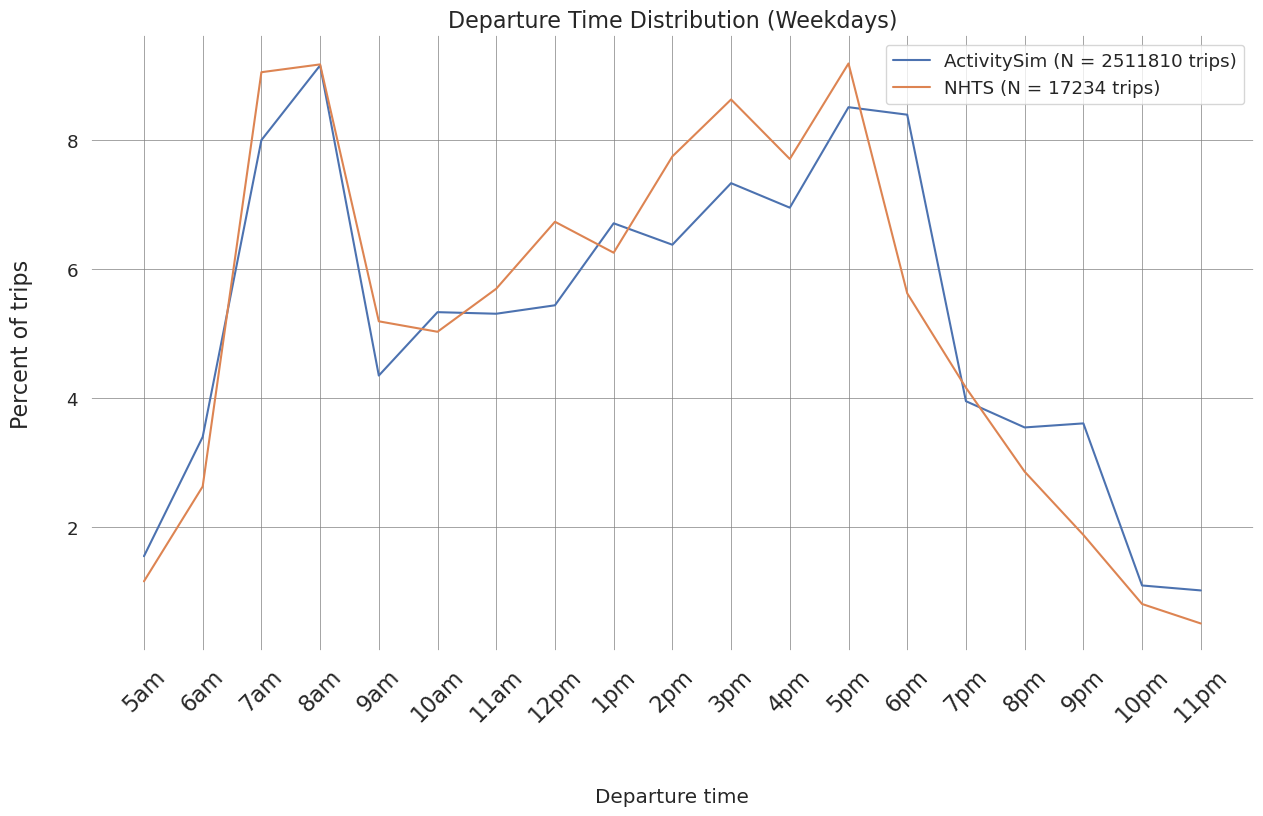

In [227]:
plot_deptime = merged_depart.plot(x = 'Departure time', kind = 'line', figsize=(15,8))
plot_deptime.legend(legend_deptime, facecolor = 'white')
plot_deptime.xaxis.set_label_coords(0.5, -0.22)
plot_deptime.yaxis.set_label_coords(-0.05, 0.5)
plt.ylabel('Percent of trips', fontsize=16)
df_plot.legend(legend_deptime, fontsize=16, facecolor = 'white')
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.xticks(ticks = np.arange(0, 19, step=1), labels = [
                        '5am', '6am', '7am', '8am', 
                        '9am', '10am', '11am', '12pm', 
                        '1pm', '2pm', '3pm', '4pm', 
                        '5pm', '6pm', '7pm', '8pm', 
                        '9pm', '10pm', '11pm'
                    ], fontsize=16, rotation=45)
plt.title('Departure Time Distribution (Weekdays)', fontsize=16)
plt.savefig('Dep_Time_Validation.png', bbox_inches='tight')

In [149]:
#******************************************************************************************************************

In [150]:
#================================================= TRIP PURPOSE =================================================

In [151]:
#----------------------------------------------- NHTS  Trip Purpose -----------------------------------------------

In [152]:
# create a new column 'Purpose' based on values in column 'purpose'
nhts_sfbay.loc[ nhts_sfbay['WHYTRP1S'] == 97, 'Purpose' ] = 'Other Discretionary' 
nhts_sfbay.loc[ nhts_sfbay['WHYTRP1S'] == 50, 'Purpose' ] = 'Social'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 1, 'Purpose'] = 'Home'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 40, 'Purpose'] = 'Shopping'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 80, 'Purpose'] = 'Eat Out'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 70, 'Purpose'] = 'Escort'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 30, 'Purpose'] = 'Other Maintenance'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 10, 'Purpose'] = 'Work'
nhts_sfbay.loc[nhts_sfbay['WHYTRP1S'] == 20, 'Purpose'] = 'School/University'

In [153]:
nhts_sfbay.Purpose.unique()

array(['Social', 'Work', 'Home', 'Shopping', 'Other Discretionary',
       'Escort', 'School/University', 'Eat Out', 'Other Maintenance'],
      dtype=object)

In [154]:
nhts_sfbay_purpose = nhts_sfbay.groupby('Purpose')[['WTTRDFIN']].sum()

In [155]:
nhts_sfbay_purpose

,WTTRDFIN
Purpose,
Eat Out,3.847219e+08
Escort,5.912520e+08
Home,2.015342e+09
Other Discretionary,1.568685e+08
Other Maintenance,9.486176e+07
School/University,3.579748e+08
Shopping,7.947280e+08
Social,6.068317e+08
Work,9.869563e+08


In [156]:
nhts_sfbay_purpose_percent = nhts_sfbay_purpose['WTTRDFIN'].transform(lambda x: x / x.sum() * 100)
nhts_sfbay_purpose_percent = nhts_sfbay_purpose_percent.reset_index()
nhts_sfbay_purpose_percent

,Purpose,WTTRDFIN
0,Eat Out,6.423234
1,Escort,9.871415
2,Home,33.647708
3,Other Discretionary,2.619042
4,Other Maintenance,1.583791
5,School/University,5.976669
6,Shopping,13.268605
7,Social,10.131529
8,Work,16.478007


In [157]:
#------------------------------------------- ActivitySim Trip Purpose -------------------------------------------

In [158]:
actSim.purpose.unique()

array(['shopping', 'Home', 'work', 'escort', 'othmaint', 'eatout',
       'atwork', 'Work', 'othdiscr', 'social', 'univ', 'school'],
      dtype=object)

In [159]:
# Create a new column 'Purpose' based on values in column 'purpose'
conditions = [
    actSim['purpose'].isin(['work','atwork', 'Work']),
    actSim['purpose'].isin(['school', 'univ']),
    actSim['purpose'] == 'othdiscr',
    actSim['purpose'] == 'social',
    actSim['purpose'] == 'Home',
    actSim['purpose'] == 'shopping',
    actSim['purpose'] == 'eatout',
    actSim['purpose'] == 'escort',
    actSim['purpose'] == 'othmaint'
]

values = ['Work', 'School/University', 'Other Discretionary', 'Social', 
          'Home', 'Shopping', 'Eat Out', 'Escort', 'Other Maintenance']
actSim['Purpose'] = np.select(conditions, values)

In [160]:
n_rows_actSim = actSim.shape[0]
n_rows_actSim # 2459473

2511810

In [161]:
actSim_purpose = actSim.groupby('Purpose')[['trip_id']].count()
actSim_purpose.head

<bound method NDFrame.head of                      trip_id
Purpose                     
Eat Out               120032
Escort                215394
Home                  896089
Other Discretionary   136816
Other Maintenance     152827
School/University     154035
Shopping              248235
Social                 60372
Work                  528010>

In [162]:
# actSim_purpose = actSim.groupby('Purpose')[['trip_id']].count()
# actSim_purpose.columns = ['Trip purpose']
# actSim_purpose = actSim_purpose.reset_index()
actSim_purpose['ActivitySim'] = actSim_purpose['trip_id'].transform(lambda x: x / x.sum() * 100)
actSim_purpose = actSim_purpose.reset_index()

In [163]:
actSim_purpose

,Purpose,trip_id,ActivitySim
0,Eat Out,120032,4.778705
1,Escort,215394,8.575251
2,Home,896089,35.675031
3,Other Discretionary,136816,5.446909
4,Other Maintenance,152827,6.084338
5,School/University,154035,6.132430
6,Shopping,248235,9.882714
7,Social,60372,2.403526
8,Work,528010,21.021096


In [164]:
actSim_purpose = actSim_purpose[['Purpose', 'ActivitySim']]
actSim_purpose

,Purpose,ActivitySim
0,Eat Out,4.778705
1,Escort,8.575251
2,Home,35.675031
3,Other Discretionary,5.446909
4,Other Maintenance,6.084338
5,School/University,6.132430
6,Shopping,9.882714
7,Social,2.403526
8,Work,21.021096


In [165]:
#-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+ Generate the table for the plots -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+c

In [166]:
trip_purp_validation = pd.merge(actSim_purpose,
                                          nhts_sfbay_purpose_percent,
                                          on = 'Purpose', how = 'left')

In [167]:
trip_purp_validation

,Purpose,ActivitySim,WTTRDFIN
0,Eat Out,4.778705,6.423234
1,Escort,8.575251,9.871415
2,Home,35.675031,33.647708
3,Other Discretionary,5.446909,2.619042
4,Other Maintenance,6.084338,1.583791
5,School/University,6.132430,5.976669
6,Shopping,9.882714,13.268605
7,Social,2.403526,10.131529
8,Work,21.021096,16.478007


In [168]:
trip_purp_validation.to_csv('outputs/trip_purp_distribution.csv')

In [169]:
# LEGEND for the plot
ActSim_legend_purp = 'ActivitySim (N = ' + str(actSim.shape[0]) + ' ' + 'trips)'
nhts_legend_purp = 'NHTS (N = ' + str(nhts_sfbay.shape[0]) + ' ' + 'trips)'
legend_purp = [ActSim_legend_purp, nhts_legend_purp]

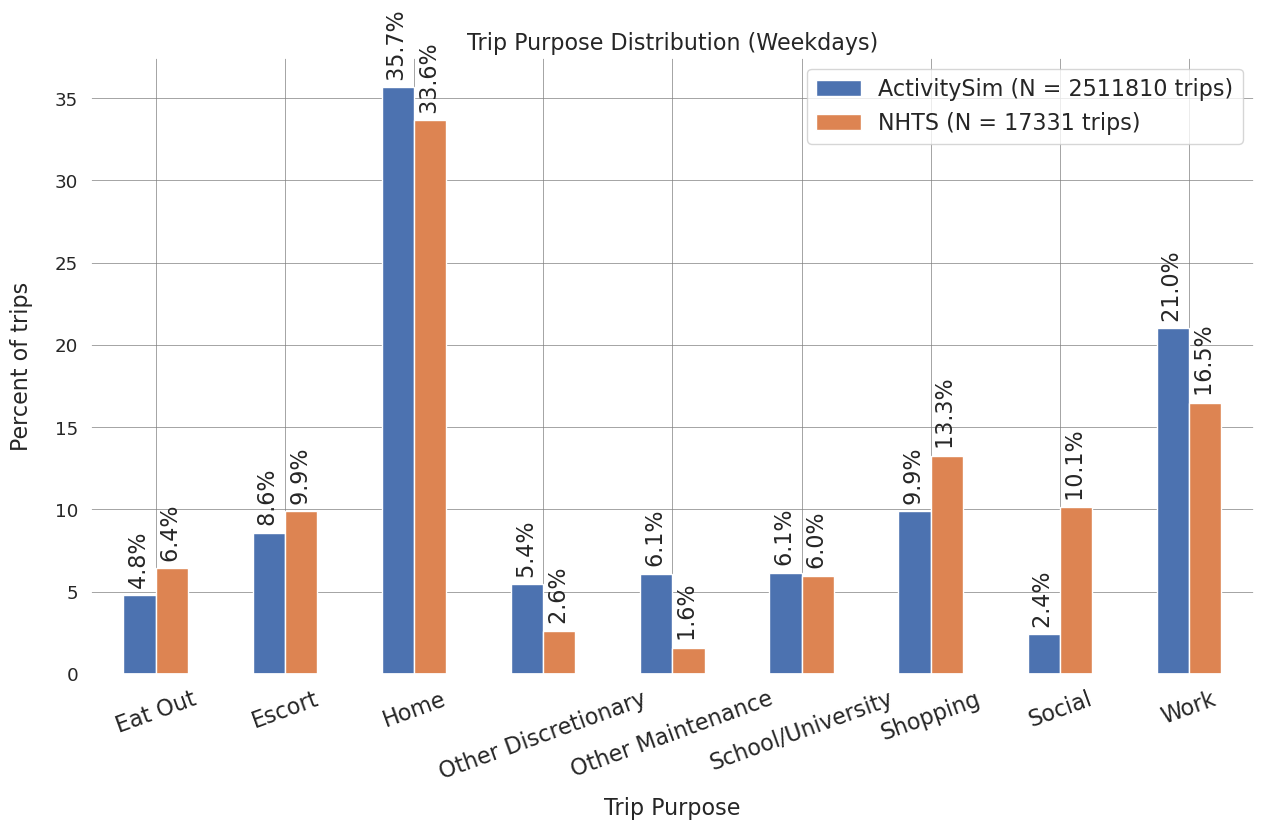

In [239]:
# Plot
df = trip_purp_validation
df_plot = df.plot('Purpose', kind = 'bar', figsize=(15,8)) # , figsize=(15,4) , width=1
plt.gca().set_facecolor('white')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
for p in df_plot.containers:
    df_plot.bar_label(p, fmt=' %.1f%%', label_type='edge', fontsize = 16, rotation = 90)
    df_plot.xaxis.set_label_coords(0.5, -0.2)
    df_plot.yaxis.set_label_coords(-0.05, 0.5)
    df_plot.legend(legend_purp, fontsize=16, facecolor = 'white')
plt.xlabel('Trip Purpose', fontsize = 16)
plt.ylabel('Percent of trips', fontsize = 16)
plt.xticks(rotation = 20, fontsize=16)
plt.title('Trip Purpose Distribution (Weekdays)', fontsize=16)
plt.savefig('Trip_Purp_Validation.png', dpi = 200, bbox_inches = 'tight') # plt.savefig(plotname, dpi = 200, bbox_inches = 'tight')
plt.show()